In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

from util import get_model_and_test_dataloader_from_configs, visualize_batched_segmentation_sample

## Load model for inference ##

In [2]:
!ls ../../config/model_configs/downstream_tasks/feature_extractors/multilabel/s2_s1.yaml

../../config/model_configs/downstream_tasks/feature_extractors/multilabel/s2_s1.yaml


In [3]:
!ls ../../config/model_configs/downstream_tasks/tier_1

conditional		 ewc-regression.yaml
ewc-classification.yaml  ewc-segmentation.yaml


In [4]:
backbone_config_path = Path("../../config/model_configs/downstream_tasks/feature_extractors/multilabel/s2_s1.yaml")
downstream_head_config_path = Path("../../config/model_configs/downstream_tasks/tier_1/ewc-segmentation.yaml")
checkpoints_root_path = Path("../..")

In [5]:
pl_module, test_dataloader = get_model_and_test_dataloader_from_configs(
    backbone_config_path=backbone_config_path,
    downstream_head_config_path=downstream_head_config_path,
    checkpoints_root_path=checkpoints_root_path,
    test_beton_file="/ds2/remote_sensing/ben-ge/ffcv/ben-ge-60-delta-multilabel-test.beton",
    custom_batch_size=3,
)

## Visualize Ben-Ge results ##

In [6]:
count = 5
for i, batch in enumerate(test_dataloader):
    if i == count:
        break
new_batch = {}
for k, v in batch.items():
    if hasattr(v, "to"):
        v = v.to(pl_module.device)
    new_batch[k] = v

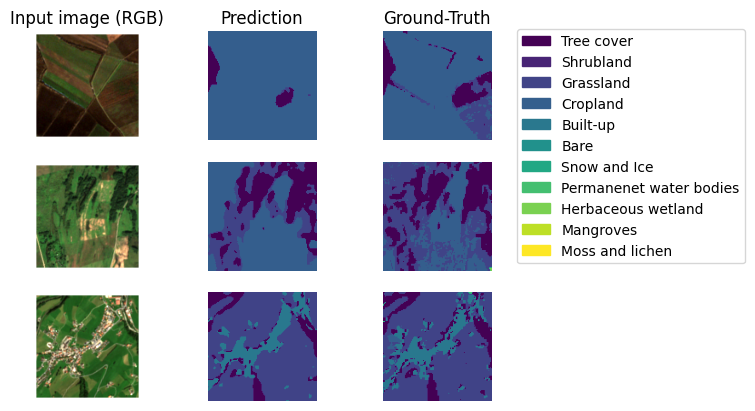

In [12]:
ESA_WC_MAP = ["Tree cover", "Shrubland", "Grassland", "Cropland", "Built-up", "Bare", "Snow and Ice", "Permanenet water bodies", "Herbaceous wetland", "Mangroves", "Moss and lichen" ]

visualize_batched_segmentation_sample(
    image=batch["sentinel_2"], 
    y_hat=pl_module.downstream_model(new_batch), 
    y=new_batch["esa_worldcover"],
    dimming_factor=6.5,
    num_classes=len(ESA_WC_MAP),
    value_to_class_mapping=ESA_WC_MAP,
)

plt.savefig("./new_ben_ge_examples.png", dpi=300, bbox_inches="tight")